## 1.2.1 Getting Started with Images

In [4]:
import cv2
import numpy as np
img = cv2.imread('cat.jpg')

### Display an image

In [5]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Write an images

In [8]:
cv2.imwrite('cat.jpg',img)

### Sum it up

In [13]:
import numpy as np
import cv2
img = cv2.imread('cat.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('cat.jpg',img)
    cv2.destroyAllWindows()

### Using matplotllib

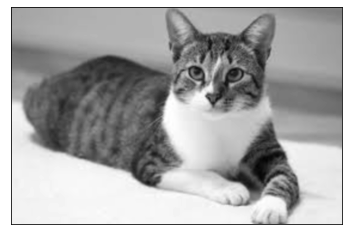

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('cat.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


# 1.2.2 Getting Started with Videos


### Capture Video from Camera

In [17]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Playing Video from file

In [20]:
import numpy as np
import cv2
cap = cv2.VideoCapture('tracking1.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Saving a Video

In [1]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('tracking2.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        
        # write the flipped frame
        out.write(frame)
        
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


# 1.2.3 Drawing Functions in OpenCV

### Drawing Line

In [4]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [ ]:
img = np.zeros((512,512,3), np.uint8)
img = cv2.imread('cat.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('cat.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.createTrackbar('value','image',0,255,nothing)
while(1):
    img = cv2.imread('mountain.jpg')
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
    if ix != -1 and iy != -1:
        cv2.rectangle(img,(ix,iy),(cx,cy),(0,255,0),0)
    msg = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(cx)+","+str(cy)+")"
    cv2.putText(img,msg,(10,30),font,.6,(255,255,255),1,cv2.LINE_AA)
    cv2.imshow('image',img)
cv2.destroyAllWindows()

# 1.2.4 Mouse as a Paint-Brush

In [ ]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
            

In [1]:
img = np.zeros((512,512,3), np.uint8)
img = cv2.imread('cat.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [2]:
img = cv2.imread('cat.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.createTrackbar('value','image',0,255,nothing)
while(1):
    img = cv2.imread('mountain.jpg')
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
    if ix != -1 and iy != -1:
        cv2.rectangle(img,(ix,iy),(cx,cy),(0,255,0),0)
    msg = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(cx)+","+str(cy)+")"
    cv2.putText(img,msg,(10,30),font,.6,(255,255,255),1,cv2.LINE_AA)
    cv2.imshow('image',img)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

# 1.2.5 Trackbar as the Color Palette

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
# get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()

#### Practice

In [6]:
import cv2
import numpy as np
img = cv2.imread('cat.jpg')

In [7]:
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

In [8]:
px = img[12,5]

In [9]:
print(px, px[0])

[148 162 180] 148


In [15]:
img = cv2.imread('sky.jpg')
sx = 300
sy = 500
for x in range(90):    
    for y in range(90):
        p=img[sy+x,sx+x];
        img[sy+y,sx+x] = [0,p[1],0]

In [16]:
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

In [ ]:
## img.item(0,10,0) blue
## img.item(0,10,1) green
## img.item(0,10,2) red


In [17]:
img.shape

(960, 1920, 3)

In [18]:
img.size

5529600

In [19]:
ball = img[280:340, 330:390]

In [20]:
img = cv2.imread('sky.jpg')
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

In [21]:
img[:,:,2] = 0 # 레드채널 없앰

In [22]:
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()